# <center> Met-data

Blandine Jacob

### Import packages

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import numpy as np
import cartopy.crs as ccrs
from cmocean import cm as cmo  
import cartopy.feature as cfeature
import matplotlib as mpl
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.dates as mdates
import datetime
from windrose import WindroseAxes

#### Useful function from Johan

In [2]:
def gridlines(ax,lon_tick,lat_tick):
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                      x_inline=False, y_inline=False,
                      linewidth=0.75, alpha=0.5, linestyle='--',color='w',
                      ylocs = mpl.ticker.MultipleLocator(base=lat_tick),xlocs = mpl.ticker.MultipleLocator(base=lon_tick))
    gl.top_labels = False
    gl.right_labels = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER

    gl.xpadding=10
    gl.ypadding=10

#### Read met data

In [3]:
# call the day you want and the corresponding file
# can definitely be improved but lack of time right now!
day = ['03-05-2023','04-05-2023','05-05-2023']
files = ['weather/weather/Weather230503.csv', 'weather/weather/Weather230504.csv', 'weather/weather/Weather230505.csv']

In [4]:
data = pd.read_csv(files[1])
data.head(2)

,lat,long,geom,gndspeed,gndcourse,ts,airtemp,humidity,airpressure,windspeed,winddir
0,10.590154,57.719062,0101000020E6100000093543AA282E2540EFE53E390ADC...,0.0,204.93,2023-05-04 00:00:47,4.9,85,1024.9,1.4,94
1,10.590153,57.719064,0101000020E6100000C845B588282E254090DD054A0ADC...,0.0,201.11,2023-05-04 00:01:47,4.9,85,1024.9,1.4,66


(56.0, 59.0)

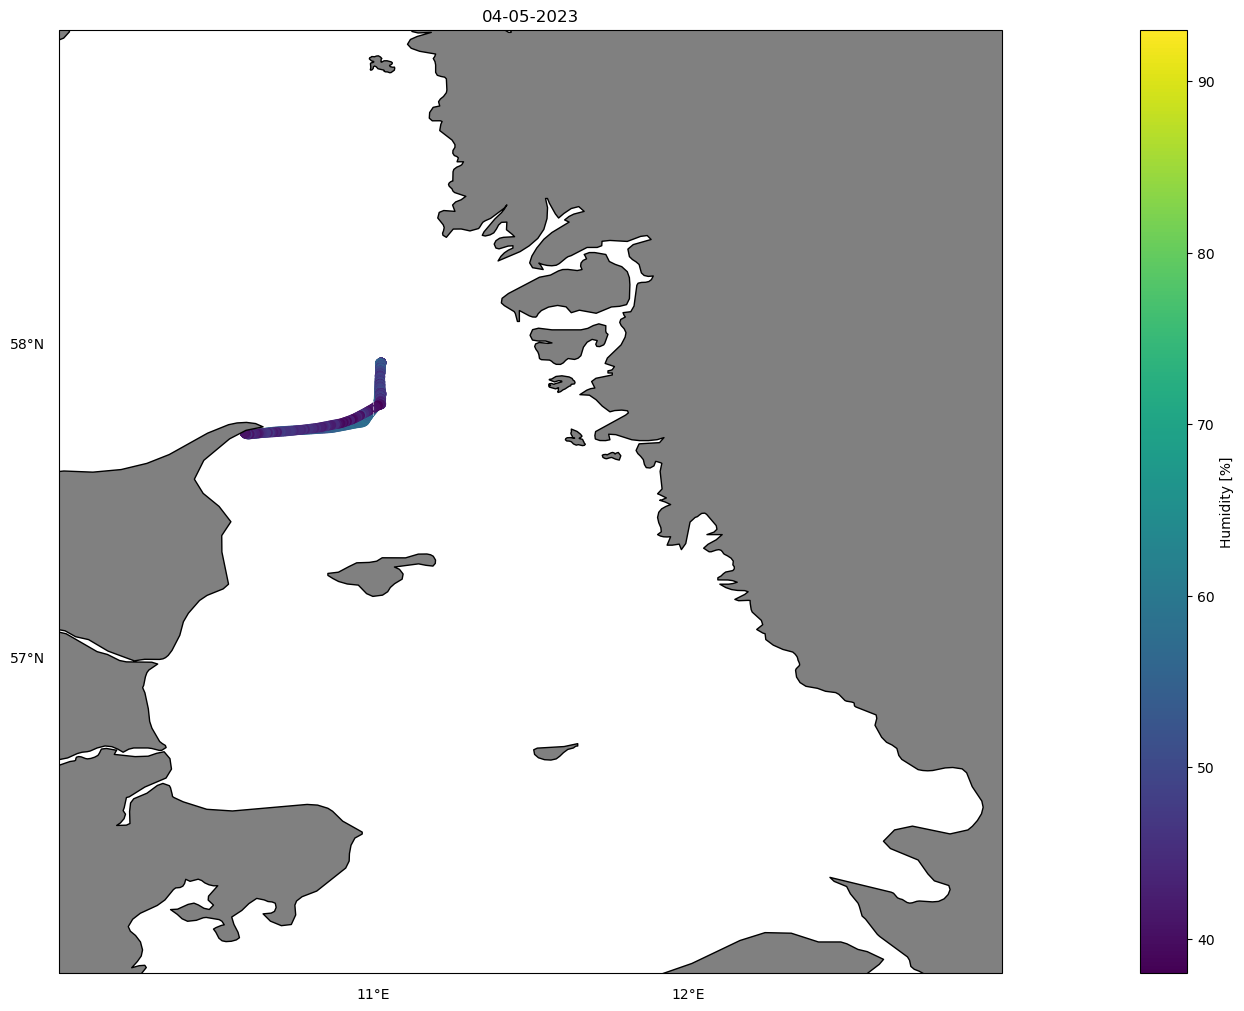

In [5]:
fig, ax = plt.subplots(1,figsize=(30,10),subplot_kw={'projection':ccrs.PlateCarree()},constrained_layout=True)

hum_scatter = ax.scatter(np.array(data.lat),np.array(data.long), c=np.array(data.humidity))
plt.colorbar(hum_scatter, ax=ax, label='Humidity [%]')


# Add land and coastline
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',facecolor='grey',edgecolor='k'),zorder=3)

# Define z-order for the spines, aka frame, so that it's above the map features
for axs in [ax]:
    for k,spine in axs.spines.items():  #ax.spines is a dictionary
        spine.set_zorder(12)
    gridlines(axs,1,1)
    
ax.set_title(day[1])
ax.set_xlim([10,13])
ax.set_ylim([56,59])


/var/folders/cm/ytn6_v01203dn79xy8p0r_700000gn/T/ipykernel_7238/1211266504.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(411)


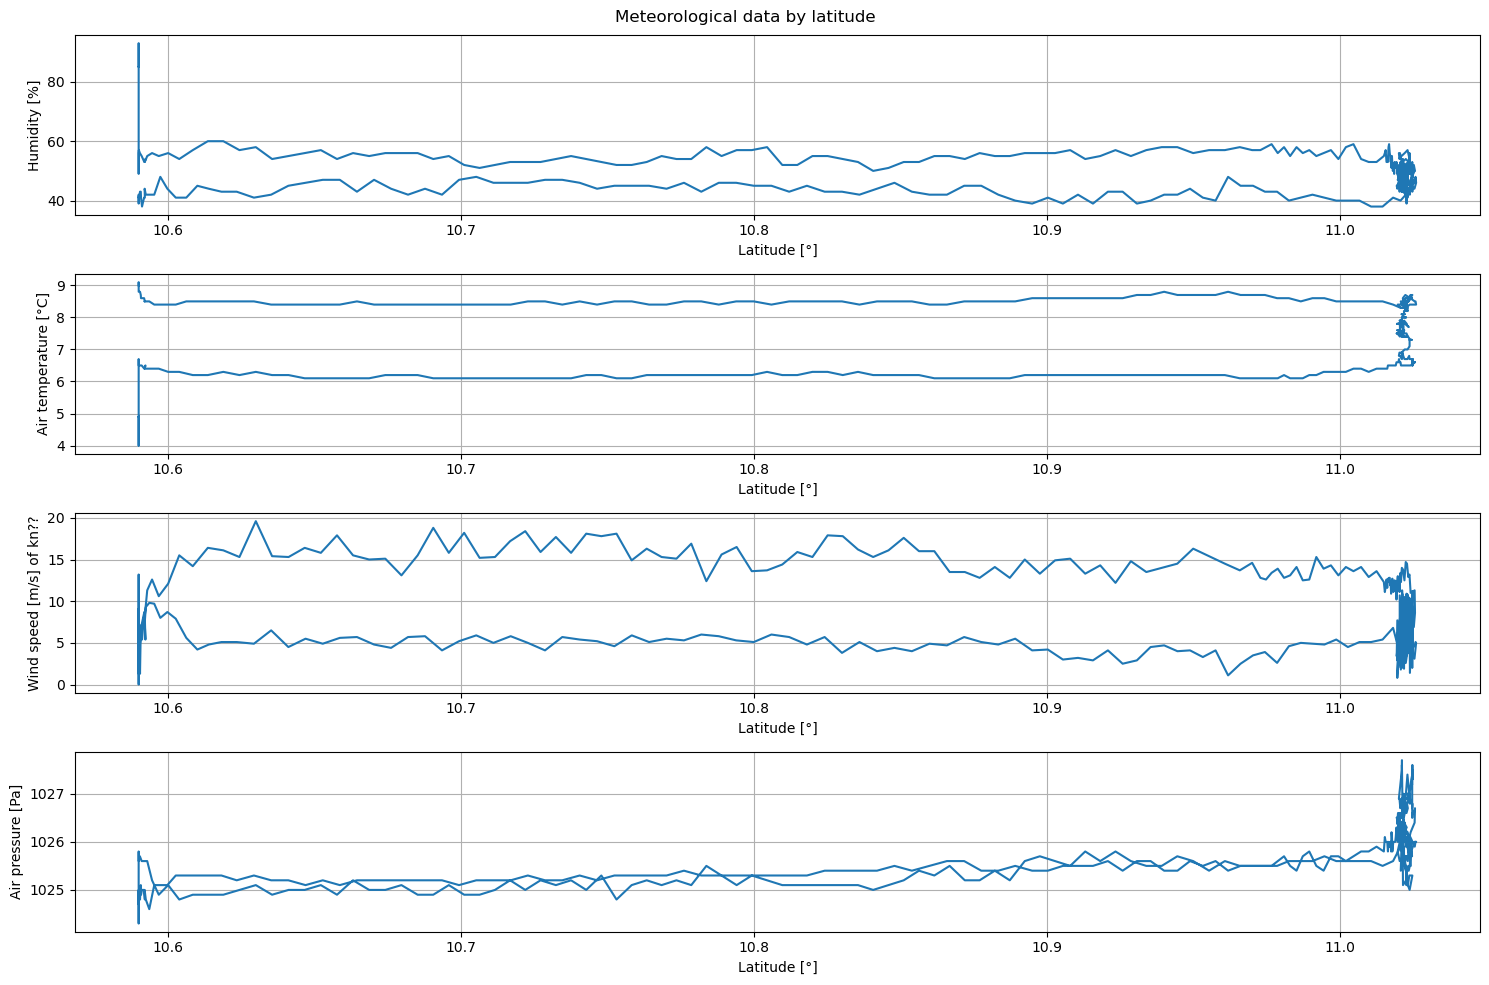

In [6]:
fig = plt.subplots(figsize= [15,10])


plt.subplot(411)
plt.plot(data.lat, data.humidity)
plt.xlabel('Latitude [°]')
plt.ylabel('Humidity [%]')
plt.suptitle('Meteorological data by latitude')
plt.grid()

plt.subplot(412)
plt.plot(data.lat, data.airtemp)
plt.xlabel('Latitude [°]')
plt.ylabel('Air temperature [°C]')
plt.grid()

plt.subplot(413)
plt.plot(data.lat, data.windspeed)
plt.xlabel('Latitude [°]')
plt.ylabel('Wind speed [m/s] of kn??')
plt.grid()

plt.subplot(414)
plt.plot(data.lat, data.airpressure)
plt.xlabel('Latitude [°]')
plt.ylabel('Air pressure [Pa]')
plt.grid()

plt.tight_layout()


In [7]:
date = data.ts.astype('datetime64[ns]')
date.head(2)

0   2023-05-04 00:00:47
1   2023-05-04 00:01:47
Name: ts, dtype: datetime64[ns]

/var/folders/cm/ytn6_v01203dn79xy8p0r_700000gn/T/ipykernel_7238/138700023.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(411)


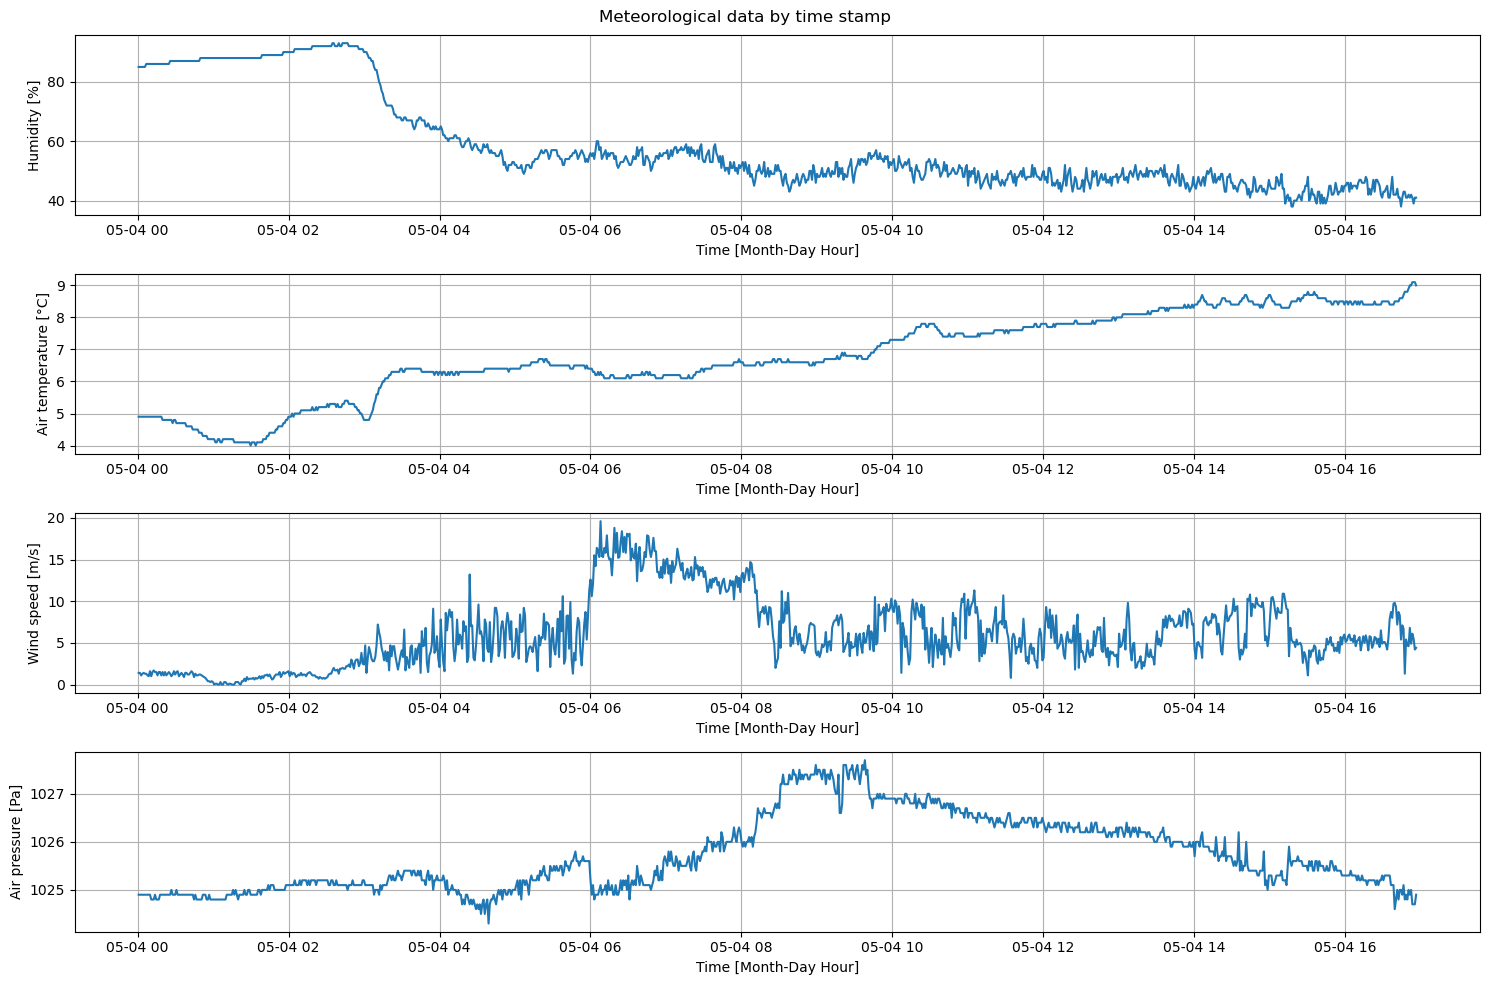

In [8]:
fig = plt.subplots(figsize= [15,10])


plt.subplot(411)
plt.plot(date, data.humidity)
plt.xlabel('Time [Month-Day Hour]')
plt.ylabel('Humidity [%]')
plt.suptitle('Meteorological data by time stamp')
plt.grid()

plt.subplot(412)
plt.plot(date, data.airtemp)
plt.xlabel('Time [Month-Day Hour]')
plt.ylabel('Air temperature [°C]')
plt.grid()

plt.subplot(413)
plt.plot(date, data.windspeed)
plt.xlabel('Time [Month-Day Hour]')
plt.ylabel('Wind speed [m/s]')
plt.grid()

plt.subplot(414)
plt.plot(date, data.airpressure)
plt.xlabel('Time [Month-Day Hour]')
plt.ylabel('Air pressure [Pa]')
plt.grid()

plt.tight_layout()



#### Rose plot

Text(0.5, 1.0, 'Wind rose - 03-05-2023')

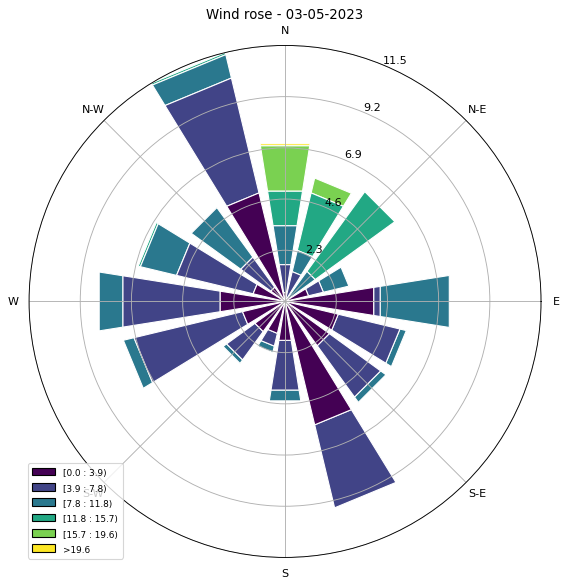

In [9]:
ax = WindroseAxes.from_ax()
ax.bar(data.winddir, data.windspeed, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.set_title('Wind rose - 03-05-2023')

### Quiver plot every 10 points

In [10]:
u = data['windspeed'] * np.cos(np.radians(data['winddir']))
v = data['windspeed'] * np.sin(np.radians(data['winddir']))

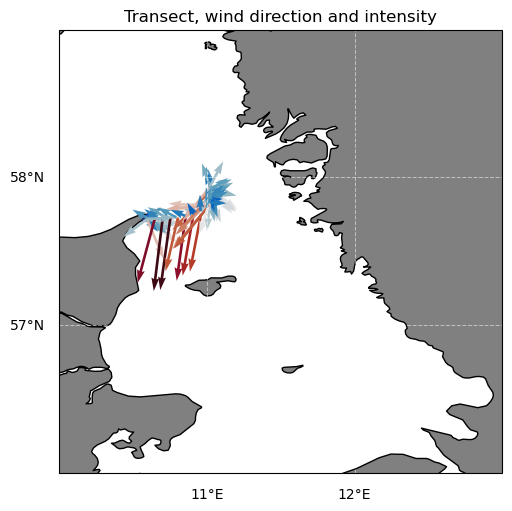

In [11]:
fig, ax = plt.subplots(1,figsize=(10,5),subplot_kw={'projection':ccrs.PlateCarree()},constrained_layout=True)

n = 10

plt.quiver(data['lat'][::n], data['long'][::n], u[::n], v[::n], data['windspeed'][::n], cmap=cmo.balance,angles=270-data['winddir'][::n])
# Data from meteorological degrees to mathematical degrees

# Add land and coastline
ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', '10m',facecolor='grey',edgecolor='k'),zorder=0)


# Define z-order for the spines, aka frame, so that it's above the map features
for axs in [ax]:
    for k,spine in axs.spines.items():  #ax.spines is a dictionary
        spine.set_zorder(12)
    gridlines(axs,1,1)
            #axs.plot([start[1],end[1]],[start[0],end[0]],c='k',zorder=3) 
    
ax.set_xlim([10,13])
ax.set_ylim([56,59])
ax.set_title('Transect, wind direction and intensity')


plt.show()